In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from pycaret.regression import *

In [2]:
df = pd.read_csv('./car/k5_firstName_dummies.csv')
df

,year,distance,name_2nd,name_3rd,name_normal,name_the_new,name_the_new_2nd,name_the_new_3rd,fuel_LPG,fuel_diesel,...,mp3,AUX,USB,handsfree,iPod,back_monitor,mirroring,non_genu_navi,bluetooth,price
0,20,140007,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,1490
1,19,64825,False,False,False,False,True,False,False,False,...,0,1,1,0,0,0,1,0,1,1590
2,20,75438,False,True,False,False,False,False,False,False,...,0,1,1,0,0,0,0,0,1,1990
3,20,119248,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,1399
4,20,101372,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,1459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,20,50687,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,2200
2202,13,140446,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,790
2203,17,118939,True,False,False,False,False,False,True,False,...,0,1,0,0,0,0,0,0,0,870
2204,20,65173,False,True,False,False,False,False,False,False,...,1,0,0,0,0,0,0,0,0,2490


In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1764, 98)
(442, 98)
(1764,)
(442,)


In [5]:
# feature / label 구분
sample = setup(data=df, target='price', train_size=0.8, data_split_shuffle=True)

,Description,Value
0,Session id,8933
1,Target,price
2,Target type,Regression
3,Original data shape,"(2206, 99)"
4,Transformed data shape,"(2206, 99)"
5,Transformed train set shape,"(1764, 99)"
6,Transformed test set shape,"(442, 99)"
7,Numeric features,82
8,Preprocess,True
9,Imputation type,simple


In [6]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [7]:
best_5 = compare_models(n_select=5, exclude=['et'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,115.3349,25330.4137,158.7274,0.9545,0.1349,0.1040,0.1250
lightgbm,Light Gradient Boosting Machine,113.8135,25768.1177,159.8396,0.9538,0.1332,0.1018,0.1310
xgboost,Extreme Gradient Boosting,121.1402,29305.8544,170.7300,0.9475,0.1417,0.1085,0.0780
rf,Random Forest Regressor,124.4311,29414.2101,171.0510,0.9472,0.1431,0.1117,0.3570
lasso,Lasso Regression,144.4607,37563.6786,193.5473,0.9325,0.2523,0.1447,0.0290
llar,Lasso Least Angle Regression,144.4593,37562.8843,193.5453,0.9325,0.2523,0.1447,0.0210
ridge,Ridge Regression,144.1836,37789.0169,194.0538,0.9322,0.2474,0.1433,0.0180
br,Bayesian Ridge,144.9017,37876.9421,194.3075,0.9320,0.2491,0.1451,0.0230
lr,Linear Regression,144.2077,38184.2156,195.0051,0.9315,0.2393,0.1426,0.9940
ada,AdaBoost Regressor,164.7851,44076.4114,209.3683,0.9208,0.2055,0.1721,0.1080


In [8]:
best_5

[GradientBoostingRegressor(random_state=8933),
 LGBMRegressor(n_jobs=-1, random_state=8933),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=8933, ...),
 RandomForestRegressor(n_jobs=-1, random_state=8933),
 Lasso(random_state=8933)]

In [10]:
# Create Model
gradient = create_model('gbr', fold=10)
lgb = create_model('lightgbm', fold=10)
xgb = create_model('xgboost', fold=10)
rf = create_model('rf', fold=10)
lasso = create_model('lasso', fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,126.7633,33650.3621,183.4404,0.9376,0.1459,0.1093
1,121.8756,27905.5986,167.0497,0.9528,0.1442,0.1162
2,106.7951,20228.1348,142.2256,0.9632,0.1325,0.0991
3,114.6429,25829.1079,160.7144,0.9574,0.1323,0.0998
4,107.4997,22750.2290,150.8318,0.9548,0.1297,0.0973
5,113.4570,23285.7709,152.5968,0.9549,0.1310,0.1035
6,119.1343,24116.2363,155.2940,0.9570,0.1351,0.1081
7,107.1963,20858.1936,144.4237,0.9637,0.1395,0.1032
8,114.7573,27421.4811,165.5943,0.9473,0.1273,0.0975


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,125.2292,33575.5467,183.2363,0.9378,0.1490,0.1113
1,112.9003,27063.1694,164.5089,0.9542,0.1351,0.1053
2,105.1802,20749.1838,144.0458,0.9623,0.1259,0.0935
3,119.7799,28881.6363,169.9460,0.9524,0.1352,0.1028
4,101.0963,20095.8020,141.7597,0.9601,0.1268,0.0948
5,103.4632,20823.9931,144.3052,0.9596,0.1231,0.0936
6,116.7763,23336.2515,152.7621,0.9584,0.1385,0.1081
7,108.7763,21586.5765,146.9237,0.9625,0.1379,0.1026
8,118.8764,30961.1745,175.9579,0.9405,0.1310,0.0993


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,125.4172,34127.5991,184.7366,0.9367,0.1449,0.1090
1,124.7002,36416.9468,190.8322,0.9384,0.1442,0.1127
2,119.4781,27735.2151,166.5389,0.9496,0.1395,0.1048
3,125.3804,29848.9482,172.7685,0.9508,0.1411,0.1075
4,112.9753,25583.3235,159.9479,0.9492,0.1453,0.1082
5,114.0210,23552.5152,153.4683,0.9543,0.1232,0.0982
6,116.5185,25205.0958,158.7611,0.9551,0.1483,0.1102
7,117.6080,24881.7493,157.7395,0.9567,0.1520,0.1148
8,124.8646,32523.0635,180.3415,0.9375,0.1382,0.1070


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,131.4027,36479.9396,190.9972,0.9324,0.1518,0.1149
1,121.9828,26767.3255,163.6072,0.9547,0.1452,0.1171
2,119.8069,27140.1517,164.7427,0.9507,0.1416,0.1067
3,137.6716,35706.5396,188.9617,0.9412,0.1482,0.1174
4,110.4873,23835.2986,154.3868,0.9527,0.1357,0.1025
5,118.0348,26553.3479,162.9520,0.9485,0.1377,0.1070
6,125.9940,26838.4700,163.8245,0.9522,0.1489,0.1176
7,117.8679,25518.8274,159.7461,0.9556,0.1434,0.1102
8,131.8073,34191.2643,184.9088,0.9342,0.1421,0.1122


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,154.2981,44637.6093,211.2761,0.9173,0.2447,0.1539
1,141.7522,35899.5825,189.4719,0.9392,0.2135,0.1498
2,134.2648,31552.2128,177.6294,0.9427,0.1987,0.1365
3,150.6992,41139.8314,202.8296,0.9322,0.2591,0.1468
4,141.7862,36387.0476,190.7539,0.9277,0.2202,0.1470
5,146.8724,35898.8171,189.4698,0.9304,0.3702,0.1613
6,138.1473,34955.6962,186.9644,0.9377,0.2088,0.1279
7,142.5741,33773.0549,183.7745,0.9413,0.2806,0.1499
8,139.1963,38374.7642,195.8948,0.9262,0.2235,0.1276


In [11]:
# 가장 좋은 성능 Top 5
top5 = [rank for rank in best_5]

In [12]:
top5

[GradientBoostingRegressor(random_state=8933),
 LGBMRegressor(n_jobs=-1, random_state=8933),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=8933, ...),
 RandomForestRegressor(n_jobs=-1, random_state=8933),
 Lasso(random_state=8933)]

In [13]:
# 가장 좋은 성능 top5 tuning
tuned_top5 = [tune_model(model, n_iter=100, optimize='RMSE') for model in top5]
tuned_top5

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,122.3595,31501.5575,177.4868,0.9416,0.1487,0.1099
1,113.7196,23294.2772,152.6246,0.9606,0.1371,0.1101
2,101.6040,19580.6017,139.9307,0.9644,0.1292,0.0930
3,115.5350,26461.2659,162.6692,0.9564,0.1323,0.0999
4,103.3903,20714.0066,143.9236,0.9589,0.1273,0.0960
5,109.0034,23081.5782,151.9262,0.9553,0.1285,0.0987
6,113.2922,21990.8137,148.2930,0.9608,0.1356,0.1063
7,108.4048,21267.5684,145.8340,0.9630,0.1350,0.1022
8,119.8667,31897.8901,178.5998,0.9387,0.1312,0.1006


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,122.3421,29815.0362,172.6703,0.9447,0.1406,0.1069
1,114.4673,24788.0354,157.4422,0.9580,0.1428,0.1130
2,113.4758,22386.0226,149.6196,0.9593,0.1414,0.1064
3,118.0816,26347.0285,162.3177,0.9566,0.1392,0.1064
4,108.8565,23966.5709,154.8114,0.9524,0.1379,0.1018
5,115.9487,23956.7488,154.7797,0.9536,0.1312,0.1051
6,109.8071,23416.1302,153.0233,0.9583,0.1343,0.1014
7,111.5819,22407.0425,149.6898,0.9610,0.1380,0.1062
8,113.6880,27933.9571,167.1345,0.9463,0.1324,0.0984


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,123.3001,32122.4640,179.2274,0.9405,0.1472,0.1096
1,111.1451,21702.4622,147.3176,0.9633,0.1346,0.1080
2,97.6231,18015.8733,134.2232,0.9673,0.1238,0.0911
3,118.0874,27092.7711,164.5988,0.9554,0.1390,0.1054
4,104.5106,21563.5807,146.8454,0.9572,0.1270,0.0963
5,110.2637,22848.7790,151.1581,0.9557,0.1251,0.0980
6,112.3037,20676.6746,143.7939,0.9632,0.1349,0.1049
7,108.6129,21892.9583,147.9627,0.9619,0.1389,0.1034
8,115.7514,28950.0516,170.1471,0.9443,0.1295,0.0972


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,133.8214,38223.4256,195.5081,0.9292,0.1531,0.1162
1,121.0988,26628.8259,163.1834,0.9549,0.1454,0.1181
2,116.8295,25965.8735,161.1393,0.9528,0.1354,0.1036
3,133.6593,31994.2013,178.8692,0.9473,0.1446,0.1160
4,111.7770,23577.1582,153.5486,0.9532,0.1311,0.1023
5,121.7059,27895.3496,167.0190,0.9459,0.1372,0.1088
6,122.5916,25632.5862,160.1018,0.9543,0.1485,0.1155
7,116.3502,24072.8923,155.1544,0.9581,0.1398,0.1084
8,128.4365,32446.0828,180.1280,0.9376,0.1388,0.1085


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,153.1780,44081.4088,209.9557,0.9183,0.2417,0.1523
1,139.1400,34741.9108,186.3918,0.9412,0.2086,0.1474
2,132.7609,30949.4654,175.9246,0.9437,0.1941,0.1346
3,151.1914,41661.6397,204.1118,0.9314,0.2442,0.1463
4,142.4440,36620.1222,191.3638,0.9273,0.2191,0.1471
5,144.5617,34755.5198,186.4283,0.9326,0.3638,0.1581
6,136.5429,34207.4965,184.9527,0.9391,0.2376,0.1262
7,142.1193,33855.6813,183.9991,0.9411,0.2771,0.1484
8,138.1166,37977.9368,194.8793,0.9270,0.2233,0.1266


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[GradientBoostingRegressor(max_depth=4, max_features=1.0,
                           min_impurity_decrease=0.01, min_samples_leaf=5,
                           n_estimators=70, random_state=8933, subsample=0.6),
 LGBMRegressor(bagging_fraction=0.4, bagging_freq=6, feature_fraction=0.5,
               learning_rate=0.05, min_child_samples=1, min_split_gain=0.9,
               n_estimators=180, n_jobs=-1, num_leaves=6, random_state=8933,
               reg_alpha=4, reg_lambda=4),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device='cpu', early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=

In [14]:
# Tuning 된 Top 5를 Blending
blended = blend_models(estimator_list=tuned_top5, fold=10, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,120.4653,30221.9962,173.8447,0.9440,0.1431,0.1042
1,107.6420,21786.2382,147.6016,0.9631,0.1349,0.1047
2,102.2359,18904.8966,137.4951,0.9656,0.1280,0.0948
3,116.5357,26418.3974,162.5374,0.9565,0.1320,0.0998
4,103.4429,21794.6708,147.6302,0.9567,0.1312,0.0958
5,108.7299,22462.2894,149.8742,0.9565,0.1289,0.0983
6,108.2875,20989.7828,144.8785,0.9626,0.1257,0.0982
7,105.4855,20969.3795,144.8081,0.9635,0.1363,0.0999
8,114.1675,27800.4564,166.7347,0.9465,0.1265,0.0958


In [104]:
# Bleding 결과가 최종 Model
final_model = finalize_model(blended)

In [105]:
X_test

,year,distance,name_HG,name_IG,name_TG,name_normal,name_the_all_new,name_the_luxury,name_the_new,fuel_LPG,...,av_sys,mp3,AUX,USB,handsfree,iPod,back_monitor,mirroring,non_genu_navi,bluetooth
1848,17,182252,False,True,False,False,False,False,False,False,...,0,0,1,1,0,0,0,0,0,0
1562,17,108304,False,True,False,False,False,False,False,False,...,0,0,1,1,1,0,0,0,0,1
144,13,246037,True,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1406,10,89564,False,False,False,False,False,True,False,False,...,1,1,0,0,0,0,0,0,0,0
1051,18,47567,False,True,False,False,False,False,False,False,...,1,0,1,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,20,33390,False,False,False,False,False,False,True,False,...,0,0,0,0,0,0,0,0,1,1
283,11,157092,True,False,False,False,False,False,False,False,...,0,1,1,1,0,1,0,0,0,1
1434,15,133098,True,False,False,False,False,False,False,False,...,0,0,1,1,0,0,0,0,0,0
643,17,145128,False,True,False,False,False,False,False,True,...,0,1,1,1,1,1,0,0,0,1


In [106]:
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['year', 'distance', 'sunroof',
                                             'HID', 'Al_wheel', 'auto_mirror',
                                             'DLR', 'sunroof_pano', 'roof_rack',
                                             'LED', 'HBA', 'ghost_door',
                                             'sliding_door', 'side_step',
                                             'adap_h', 'driver_heated_seat',
                                             'driver_ventilated_seat',
                                             'power_steering',
                                             'steering_remote', 'leahter_seat',
                                             'driver...
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=6,
                                                           max_leaves=None,
                                                           min_child_weight=4,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=100,
                                                           n_jobs=-1,
                                                           num_parallel_tree=None,
                                                           random_state=4724, ...)),
                                             ('Random Forest Regressor',
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=4724)),
                                             ('Lasso Regression',
                                              Lasso(alpha=0.45,
                                                    random_state=4724))],
                                 n_jobs=-1))])

In [115]:
tuned_top5[2]

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=4724, ...)

# Feature Importance

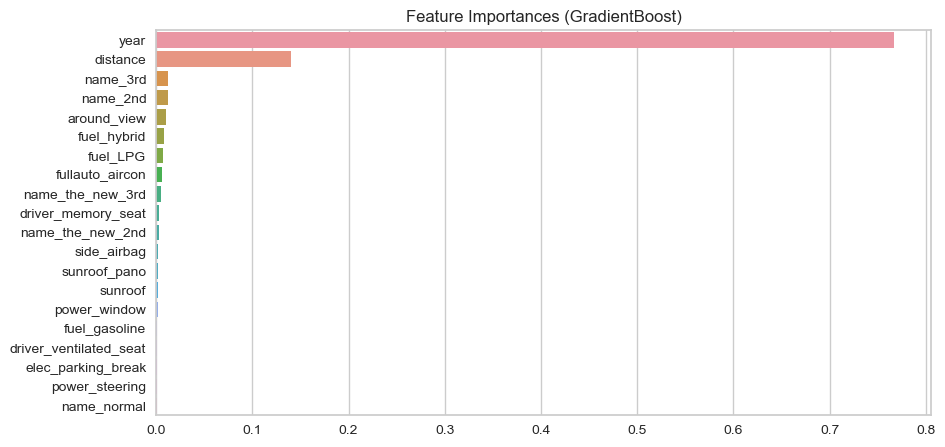

In [15]:
feature_importance = pd.Series(tuned_top5[0].feature_importances_, index=X_train.columns).sort_values(ascending=False)[:20]
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importances (GradientBoost)')
plt.show()

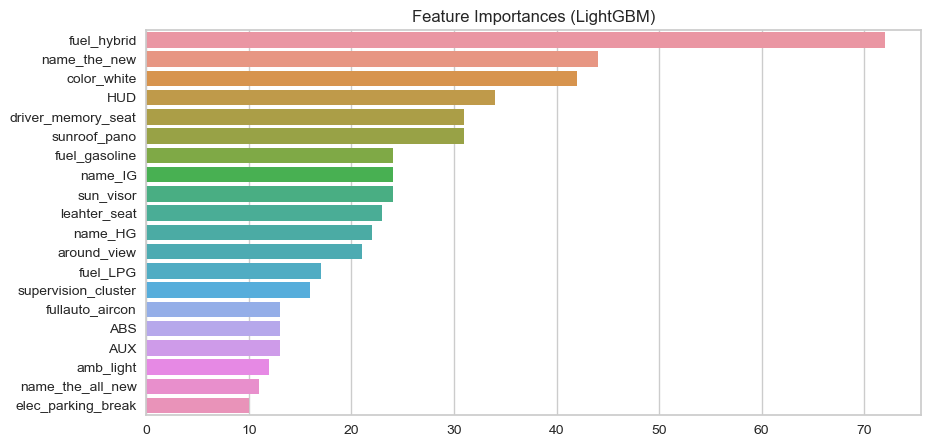

In [154]:
feature_importance = pd.Series(tuned_top5[1].feature_importances_, index=X_train.columns).sort_values(ascending=False)[2:22]
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importances (LightGBM)')
plt.show()

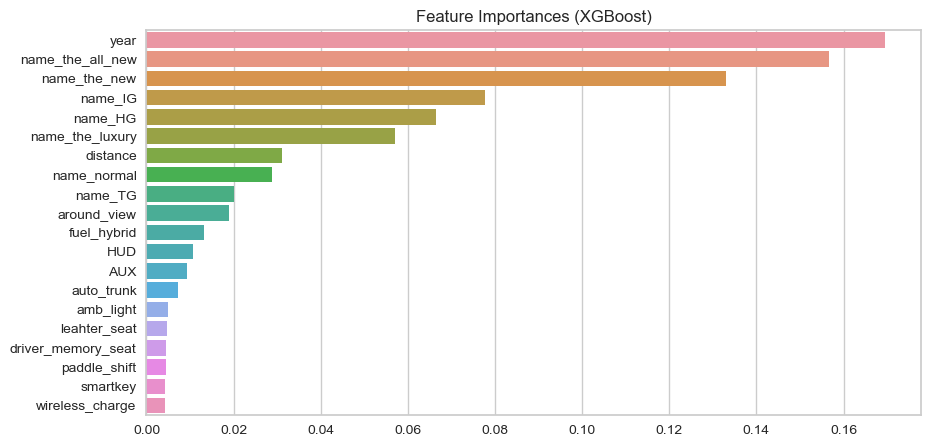

In [159]:
feature_importance = pd.Series(tuned_top5[2].feature_importances_, index=X_train.columns).sort_values(ascending=False)[:20]
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importances (XGBoost)')
plt.show()

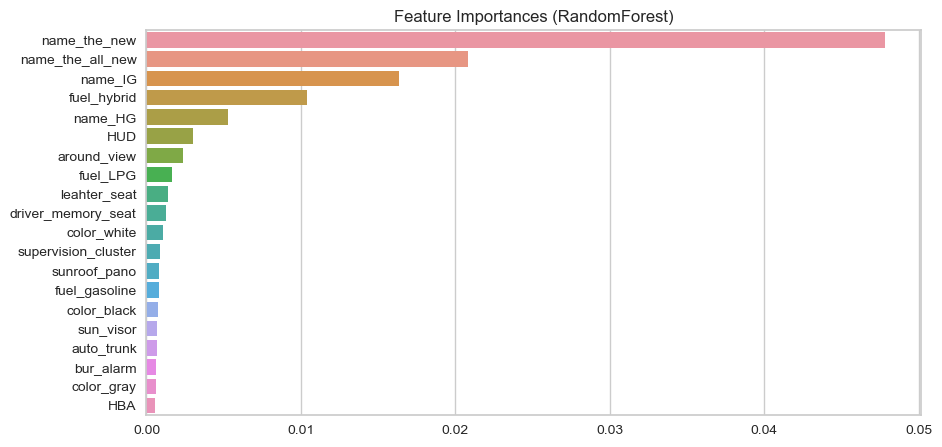

In [161]:
feature_importance = pd.Series(tuned_top5[3].feature_importances_, index=X_train.columns).sort_values(ascending=False)[2:22]
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importances (RandomForest)')
plt.show()

# Save/Load & Predict

In [116]:
# Save Model
save_model(final_model, './model/grandeur_auto')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['year', 'distance', 'sunroof',
                                              'HID', 'Al_wheel', 'auto_mirror',
                                              'DLR', 'sunroof_pano', 'roof_rack',
                                              'LED', 'HBA', 'ghost_door',
                                              'sliding_door', 'side_step',
                                              'adap_h', 'driver_heated_seat',
                                              'driver_ventilated_seat',
                                              'power_steering',
                                              'steering_remote', 'leahter_seat',
                                              'driver...
                                                            max_cat_to_onehot=None,
                                                            max_delta_step=None,
                

In [117]:
# Load Model
model_grandeur = load_model('./model/grandeur_auto')

Transformation Pipeline and Model Successfully Loaded


In [118]:
# Predict
predict = predict_model(model_grandeur, data=X_test)
predict

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


,year,distance,name_HG,name_IG,name_TG,name_normal,name_the_all_new,name_the_luxury,name_the_new,fuel_LPG,...,mp3,AUX,USB,handsfree,iPod,back_monitor,mirroring,non_genu_navi,bluetooth,prediction_label
1848,17,182252,False,True,False,False,False,False,False,False,...,0,1,1,0,0,0,0,0,0,1320.770823
1562,17,108304,False,True,False,False,False,False,False,False,...,0,1,1,1,0,0,0,0,1,1632.354978
144,13,246037,True,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,522.024316
1406,10,89564,False,False,False,False,False,True,False,False,...,1,0,0,0,0,0,0,0,0,588.485608
1051,18,47567,False,True,False,False,False,False,False,False,...,0,1,1,1,0,0,1,0,1,2187.422678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,20,33390,False,False,False,False,False,False,True,False,...,0,0,0,0,0,0,0,1,1,2890.123697
283,11,157092,True,False,False,False,False,False,False,False,...,1,1,1,0,1,0,0,0,1,570.389515
1434,15,133098,True,False,False,False,False,False,False,False,...,0,1,1,0,0,0,0,0,0,1044.804525
643,17,145128,False,True,False,False,False,False,False,True,...,1,1,1,1,1,0,0,0,1,1497.349713


In [119]:
predict['prediction_label']

1848    1320.770823
1562    1632.354978
144      522.024316
1406     588.485608
1051    2187.422678
           ...     
476     2890.123697
283      570.389515
1434    1044.804525
643     1497.349713
330     1130.671464
Name: prediction_label, Length: 396, dtype: float64

In [120]:
prediction = predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,96.6899,16771.1854,129.5036,0.9827,0.1042,0.0781


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


In [144]:
model_grandeur

Pipeline(memory=FastMemory(location=C:\Users\1104-27\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['year', 'distance', 'sunroof',
                                             'HID', 'Al_wheel', 'auto_mirror',
                                             'DLR', 'sunroof_pano', 'roof_rack',
                                             'LED', 'HBA', 'ghost_door',
                                             'sliding_door', 'side_step',
                                             'adap_h', 'driver_heated_seat',
                                             'driver_ventilated_seat',
                                             'power_steering...
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=6,
                                                           max_leaves=None,
                                                           min_child_weight=4,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=100,
                                                           n_jobs=-1,
                                                           num_parallel_tree=None,
                                                           random_state=4724, ...)),
                                             ('Random Forest Regressor',
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=4724)),
                                             ('Lasso Regression',
                                              Lasso(alpha=0.45,
                                                    random_state=4724))],
                                 n_jobs=-1))])